# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='../assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebook though as you work through this.

First off, let's load the dataset through torchvision.

In [58]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

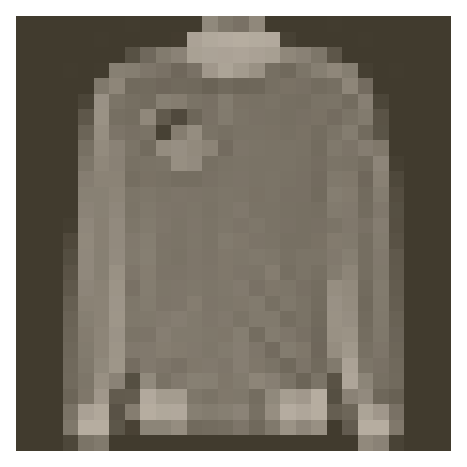

In [59]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

With the data loaded, it's time to import the necessary packages.

In [60]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
import time

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import helper

from collections import OrderedDict

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits from the forward pass. It's up to you how many layers you add and the size of those layers.

In [113]:
# TODO: Define your network architecture here
input_size = 784
hidden_sizes = [256, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('logits', nn.Linear(hidden_sizes[1], output_size))]))



# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [114]:
# TODO: Create the network, define the criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [74]:
# test
x = torch.rand(5,1,2, 2)
print(x)
x.resize_(5,4)
x

# the data has one batch that is size 32 instead of 64!
for images, label in iter(trainloader):
    if images.size()[0] != 64:
        print(images.size())

tensor([[[[0.6024, 0.0058],
          [0.6974, 0.4434]]],


        [[[0.9870, 0.4782],
          [0.5325, 0.9174]]],


        [[[0.4197, 0.0594],
          [0.2415, 0.8400]]],


        [[[0.1822, 0.0604],
          [0.8852, 0.1078]]],


        [[[0.0921, 0.4648],
          [0.6790, 0.2433]]]])
torch.Size([32, 1, 28, 28])


In [115]:
# TODO: Train the network here
epochs = 5
print_every = 40
steps = 0

for e in range(epochs):
    running_loss = 0
    for images, labels in iter(trainloader):
        steps += 1
        
        d1,d2,d3,d4 = images.size()
        images.resize_(d1, 784)
        optimizer.zero_grad()
        
        # Forward and backward passes
        output = model.forward(images)
#         if output.size()[0] == 64:
            
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()


        running_loss += loss.item()

        if steps % print_every == 0:
            print("Epoch: {}/{}... ".format(e+1, epochs),
                  "Loss: {:.4f}".format(running_loss/print_every))

            running_loss = 0
        

Epoch: 1/5...  Loss: 2.2472
Epoch: 1/5...  Loss: 2.0848
Epoch: 1/5...  Loss: 1.8769
Epoch: 1/5...  Loss: 1.6111
Epoch: 1/5...  Loss: 1.3922
Epoch: 1/5...  Loss: 1.1980
Epoch: 1/5...  Loss: 1.1096
Epoch: 1/5...  Loss: 1.0097
Epoch: 1/5...  Loss: 0.9261
Epoch: 1/5...  Loss: 0.8697
Epoch: 1/5...  Loss: 0.8125
Epoch: 1/5...  Loss: 0.7681
Epoch: 1/5...  Loss: 0.7566
Epoch: 1/5...  Loss: 0.7111
Epoch: 1/5...  Loss: 0.7274
Epoch: 1/5...  Loss: 0.6953
Epoch: 1/5...  Loss: 0.6771
Epoch: 1/5...  Loss: 0.6920
Epoch: 1/5...  Loss: 0.6516
Epoch: 1/5...  Loss: 0.6200
Epoch: 1/5...  Loss: 0.6128
Epoch: 1/5...  Loss: 0.6293
Epoch: 1/5...  Loss: 0.6214
Epoch: 2/5...  Loss: 0.3272
Epoch: 2/5...  Loss: 0.6092
Epoch: 2/5...  Loss: 0.5904
Epoch: 2/5...  Loss: 0.6367
Epoch: 2/5...  Loss: 0.5728
Epoch: 2/5...  Loss: 0.5927
Epoch: 2/5...  Loss: 0.5675
Epoch: 2/5...  Loss: 0.5793
Epoch: 2/5...  Loss: 0.5447
Epoch: 2/5...  Loss: 0.5611
Epoch: 2/5...  Loss: 0.5101
Epoch: 2/5...  Loss: 0.5503
Epoch: 2/5...  Loss:

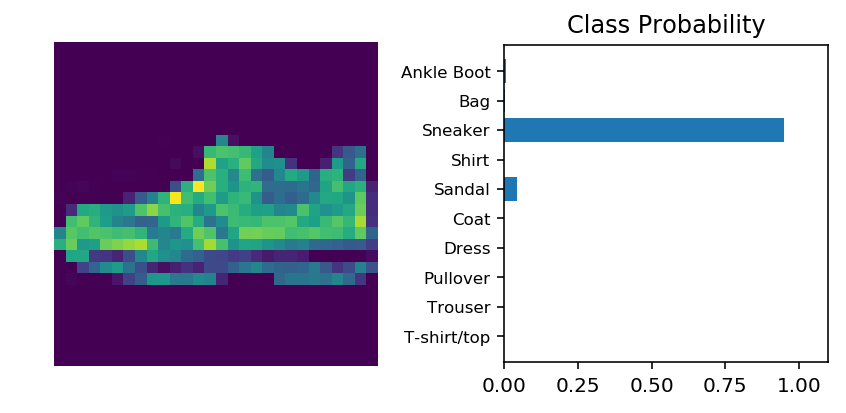

In [120]:
# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
ps = F.softmax(model.forward(img), dim=1)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

Now that your network is trained, you'll want to save it to disk so you can load it later instead of training it again. Obviously, it's impractical to train a network every time you need one. In practice, you'll train it once, save the model, then reload it for further training or making predictions. In the next part, I'll show you how to save and load trained models.